# Note de cours
## Introduction
Soit un gaz réel qui est décrit par la relations d'état
$$\left( p + \frac{a}{v^2}\right) \left( v - b \right) = RT, n = 1$$
connaissant $p, T, a, b$, que vaut le volume occupée
$$\begin{aligned}
    &P(v-b) + \frac{a}{v^{2}}(v-b) = RT\\
    \implies&P= \frac{RT}{v-b} - \frac{a}{v^{2}}\\
    \implies&P - \frac{RT}{v-b} + \frac{a}{v^{2}} = 0
\end{aligned}$$
Cette équation ne possède aucune solution analytique simple.

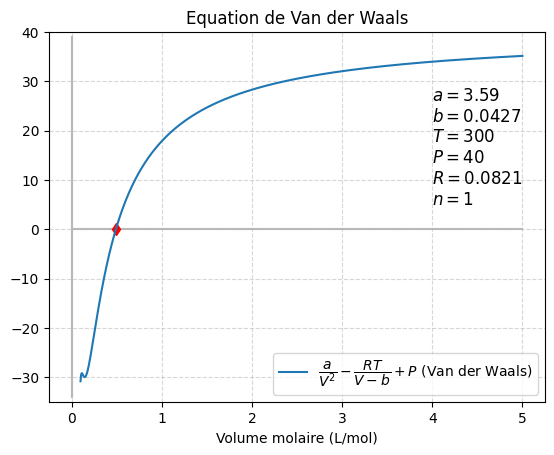

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 3.59 / x² - (0.0821 * 300) / (x - 0.0427) + 40

# Paramètres du problème : CO2 à 300K et 40 atm (bonbonne de gaz)
P = 40  # Pression en atm
T = 300  # Température en K
a = 3.59  # Constante de Van der Waals (atm L^2/mol^2)
b = 0.0427  # Constante de Van der Waals (L/mol)
R = 0.0821  # Constante des gaz parfaits (L atm/mol K)

# Fonction f(V) pour l'équation de Van der Waals
def f(V):
    return (a/V**2) - (R*T)/(V-b) + P

# Fonction f(V) pour un gaz parfait (pour comparaison)
def gp(V):
    return -(R*T)/V + P

V = np.linspace(0.1,5,1000)
Ve = 0.4918
# Représentation de la fonction
plt.plot([0, 5], [0, 0], c='0.72')
plt.plot([0, 0], [-34, 39], c='0.72')
plt.plot(Ve, 0, 'rd')
plt.plot(V, f(V), label=r'$\dfrac{a}{V^2}-\dfrac{RT}{V-b}+P$ (Van der Waals)')
#plt.plot(V, gp(V), label=r'$-\dfrac{RT}{V}+P$ (gaz parfait)')
plt.xlabel('Volume molaire (L/mol)')
plt.title(f"Equation de Van der Waals")
plt.ylim([-35, 40])
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.text(4, 5, f'${a=}$\n${b=}$\n${T=}$\n${P=}$\n${R=}$\n$n=1$', fontsize = 12)

plt.show()



### Définition du problème
Soit une fonction continue sur $f\colon [a, b] \to \R$. On aimerait trouver numériquement $\alpha \in [a, b]| f(\alpha) = 0$

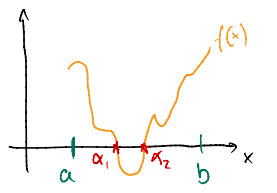

<u>Remarques</u>

1. $\alpha$ est un zéro ou une racine de $f$
2. [Nous cherchons en réalité une bonne approximation de $\alpha$](https://www.desmos.com/calculator/xsekvfvcn6?lang=fr "Page desmos")

<u>idée</u>

A partir d'une première approximation, on construit une suite comvergente $\{x_{n}\}_{k=0}^{\infty}$ valeurs approchées de la racine recherchées que
$$\lim_{k \to \infty} x_{k} = \alpha$$

<u>Définition</u>

Cette suite est dite convergente d'ordre $p \geq 1$ si
$$\exists c, k_{0} > 0 | \forall k > k_{0} | x_{k+1} - \alpha | \leq c |x_{k} - \alpha|^{p}$$

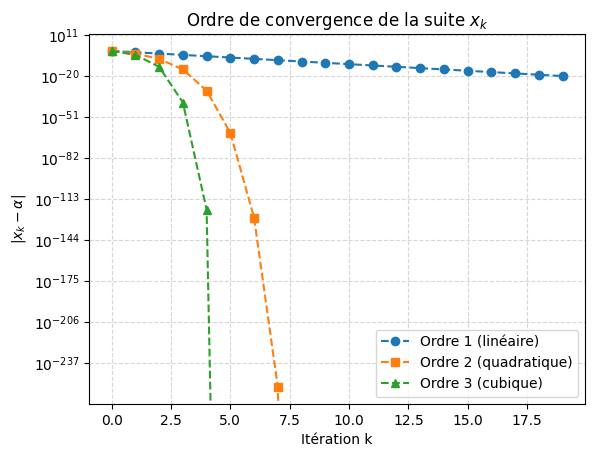

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n_iter = 20

def gen_error_convergence(p, e0=1e-1):
    # on génère un tableau d'erreurs selon une convergence
    # d'ordre p
    errors = [e0]
    for _ in range(n_iter - 1):
        next_error = 0.1*errors[-1]**p  # on définit une convergence d'ordre p
        errors.append(next_error)
    return np.array(errors)

errors_p1 = gen_error_convergence(p=1.0)
errors_p2 = gen_error_convergence(p=2.0)
errors_p3 = gen_error_convergence(p=3.0)

k = np.arange(n_iter)
# On trace en semilogy (meilleure visualisation de l'erreur)
plt.semilogy(k, errors_p1, 'o--', label="Ordre 1 (linéaire)")
plt.semilogy(k, errors_p2, 's--', label="Ordre 2 (quadratique)")
plt.semilogy(k, errors_p3, '^--', label="Ordre 3 (cubique)")

plt.xlabel("Itération k")
plt.ylabel(r"$|x_k - \alpha|$")
plt.title("Ordre de convergence de la suite $x_k$")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.show()


<u>Remarque</u>

1. Si $p = 1$, on parle de convergence linéaire. Il faut alors que $c < 1$
2. Si $p = 2$, on parle de convergence quadratique.
2. Si $p = 3$, on parle de convergence cubique.
4. $p$ peut ne pas être un entier.
5. La convergence d'une suite dépend généralement de la valeur initiale $x_{0}$

<u>Définition</u>

La différence entre la solution exacte $x_{r}$ à l'itération $k$ représente l'erreur numérique absolue $e_{k}$
$$e_{\text{abs}, k} = |x_{k} - \alpha|$$
l'erreur relative vaut
$$e_{\text{rel}, k} = \frac{e_{\text{abs}, k}}{x_{k}} = \frac{|x_{k} - \alpha|}{x_{k}}$$

## Méthode de dichotomie
Soit $f\colon [a, b] \to \R$ une fonction continue. Alors cette fonction prend toutes les valeurs entre $\min_{x \in I} f(x)$ et $\max_{x \in I} f(x)$. C'est le théorème des valeurs intermédiares.
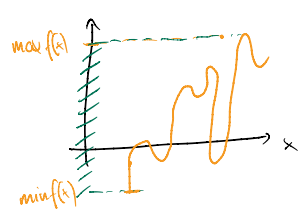

En particulier, si $f$ et $[a, b]$ sont tels que
$$f(a) \cdot f(b) < 0 \implies \exists \alpha \in (a, b) | f(\alpha) = 0$$

[### Méthode de bissection](https://www.geogebra.org/classic/dqhjte2d "Représentation")
<!-- schéma -->
On construit la suite $\{x_{k}\}_{k}^{\infty} = 0$ qui converge vers $\alpha$ en se basant sur le théorème de Bolzan, en considérant un intervalle $[a_{R}, b_{R}]$ de plus en plus petit autour de la racine recherchée.

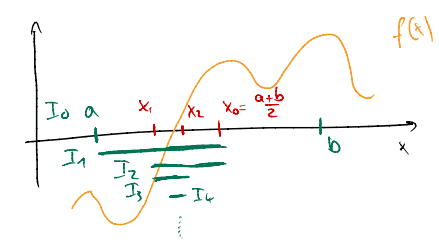

<u>Algorithme</u>

1. Choisir un intervalle de départ $[a, b]$ tel que la condition de Bolzano est satisfait.
$$f(a) \cdot f(b) < 0$$
2. Calculer le point milieu $x_{k} = \frac{b+a}{2}$ qui divise l'intervalle en deux.
3. Vérifier dans quel sous-intervalle la propriété de Bolzano est satisfaite. On a trois cas de figure:
    - si $f(x_{k}) = 0$, $x_{k}$ est la racine recherchée. De façon idéale, on commence par tester pour l'erreur que l'on s'autorise, cependant ne pas le faire rajoute au pire une itération, ce qui n'est pas dramatique.
    - si $f(a) \cdot f(x_{k}) < 0$, on pose $b = x_{k}$
    - si $f(b) \cdot f(x_{k}) < 0$, on pose $a = x_{k}$
    - On répète les étapes 2 et 3 tant que la condition d'arrêt n'est pas satisfaite. Celle-ci agit généralement sur l'erreur et/ou le nombre d'itérations maximal.

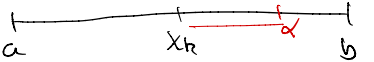

In [ ]:
"""
Cet algorithme est légèrement diffèrent de celui vu en cours.
Les changements sont les suivants :
    - On ne vérifie pas si kmax est atteint à chaque itération
    - On vérifie si la tolérance a été atteinte à la fin
    - Sinon, on préviens que kmax a été atteint
Cela permet de réduire légèrement la complexité temporelle de l'algorithme.
On a donc:
    - Complexité temporelle : O(log(b-a))
    - Complexité spatiale : O(1) (on ne garde pas les valeurs intermédiaires)
"""

def bissection(f,a,b,tol,kmax):
    '''
    INPUT
        f :     fonction à étudier
        a :     borne inférieure de l'intervalle de départ
        b :     borne supérieure de l'intervalle de départ
        tol :   tolérance sur l'erreur
        kmax :  nombre maximal d'itérations maximal autorisé
        
    OUTPUT
        xbar :  valeur approchée du zero
        mil :   liste contenant les valeurs approchées x_k 
    '''
    mil = [] # On initialise la liste des valeurs testées
    if f(a)*f(b) >= 0 : # On vérifie la condition de Bolzano
        print("Mauvais choix d'intervalle")  # Il serait encore possible de lever une exception
        return
    else:
        while (b-a)/2 > tol and len(mil) < kmax: # on continue tant que l'on n'a pas atteint la tolérance ou le nombre d'itérations maximal
            m = (a+b)/2  # on calcule le milieu de l'intervalle
            mil.append(m)  # on ajoute la valeur testée à la liste
            if f(a)*f(m) < 0: # on vérifie le signe de f(a) et f(m)
                b = m  # on remplace b par m si f(a) et f(m) ont des signes opposés
            elif f(b)*f(m) < 0: # on vérifie le signe de f(b) et f(m)
                a = m  # on remplace a par m si f(b) et f(m) ont des signes opposés
            elif f(m) == 0: # on vérifie si f(m) est égal à 0
                print("Valeur exacte trouvée")
                return mil, m  # on retourne la liste des valeurs testées et la valeur exacte trouvée
        
        if (b-a)/2 <= tol:  # on vérifie si la tolérance a été atteinte
            print(f"le zéro a été approché de manière satisfaisante au bout de {len(mil)} itérations")
        else:
            print(f"le zéro n'a pas été approché de manière satisfaisante au bout de {kmax} itérations")
    return (a+b)/2, mil  # on retourne la valeur approchée du zéro et la liste des valeurs testées



In [5]:
a0 = 0.1
b0 = 5
tol = 1e-8
kmax = 100

out = bissection(f, a0, b0, tol, kmax)

print(out[0])
print(f"Ma méthode a convergé au bout de {len(out[1])} itérations")


le zéro a été approché de manière satisfaisante au bout de 28 itérations
0.4918026937171816
Ma méthode a convergé au bout de 28 itérations


<u>Remarques</u>

1. La converge de cette méthode est lente.
2. Cette méthode n'a pas d'ordre de convergence.
3. Si la fonction possède plusieurs racines dans l'intervalle considéré, alors on détermine des sous-intervalles intéressants (possèdant une seule racine) sur lesquels on appliaue la méthode de la bissection.
4. Cette méthode ne prends pas en compte la forme de la fonction, mais ne se base que sur les intervalles.

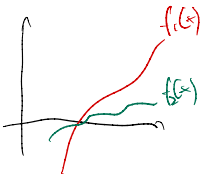

On peut donner une borne supérieure à l'erreur absolue.
$$\begin{aligned}
    e_{\text{abs}, k} =& |x_{k}-\alpha| < \frac{1}{2} | b_{k} - a_{k} | = \frac{1}{2} I_{k}\\
    <& \frac{1}{2} \cdot \left( \frac{1}{2} I_{k-1} \right) = \frac{1}{2} \cdot \frac{1}{2^{k}} I_{0}\\
    <&\frac{1}{2^{k+1}} | b_{0} - a_{0} |
\end{aligned}$$
Comme
$$\lim_{k \to \infty} e_{\text{abs}, k} = 0$$
la méthode converge à coup sûr. On impose généralement une tolérence $\varepsilon$ tel que l'algorithme termine lorsque
$$e_{\text{abs}, k} < \frac{|b-a|}{2^{k+1}} < \varepsilon$$
Le nombre minimal d'opération est tel que
$$\begin{aligned}
    &\frac{1}{2^{k+1}} |b-a | < \varepsilon\\
    \implies& 2^{k+1} > \frac{|b-a|}{\varepsilon}\\
    \implies& k_{\text{min}} = \log_{2}\left( \frac{|b-a|}{\varepsilon} \right) - 1
\end{aligned}$$
